## 使用卷积神经网络对CIFAR-10数据集进行分类

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)

2.7.0


## 下载数据集

In [2]:
datasets = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = datasets.load_data()

## 查看数据集信息

In [3]:
print("Training data shape: ", x_train.shape)
print("Training label shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training label shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


## 查看单项image和label

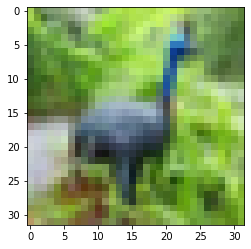

In [4]:
plt.imshow(x_train[6])

## 查看对应的标签值

In [5]:
y_train[6]

array([2], dtype=uint8)

## 定义标签字典 每一个数字所代表的图像类别的名称

In [6]:
label_dict = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse",
              8: "ship", 9: "truck"}

In [7]:
label_dict[y_train[6][0]]

'bird'

## 数据预处理

In [8]:
# 特征数据标准化
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [9]:
# 对图像image进行数字标签化
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## 定义网格结构

+ 图像特征提取：通过卷积层1，降采样层1，卷积层2以及降采样层2的处理，提取图像的特征
+ 全连接神经网路：全连接层、输出层所组成的网络结构

| 输入层                | 卷积层1                                    | 降采样层1                                      | 卷积层2                                     | 降采样层2                                    | 全连接层                                 | 输出层                      |
|--------------------|-----------------------------------------|--------------------------------------------|------------------------------------------|------------------------------------------|--------------------------------------|--------------------------|
|  32*32图像，通道为3（RGB） | 第1次卷积：输入通道：3，输出通道：32，卷积后图像尺寸不变，依然是32*32 | 第一次降采样：将32*32图像缩小为16*16；池化不改变通道数量，因此依然是32个 | 第2次卷积：输入通道：32，输出通道：64，卷积后图像尺寸不变，依然是16*16 | 第二次降采样：将16*16图像缩小为8*8；池化不改变通道数量，因此依然是64个 | 将64个8*8的图像转换为长度为4096的一维向量，该层有128个神经元 | 输出层共有10个神经元，对应到0-9这10个类别 |

In [10]:
# 建立卷积神经网络CNN模型
model = tf.keras.models.Sequential()

# 第1个卷积层
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3, 3),
                                 input_shape=(32, 32, 3),
                                 activation="relu",
                                 padding="same"))

# 防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))

# 第1个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# 第2个卷积层
model.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=(3, 3),
                                 activation="relu",
                                 padding="same"))

# 防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))

# 第2个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# 平坦层
model.add(tf.keras.layers.Flatten())

# 添加输出层
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

## 模型训练

In [12]:
# 设置训练参数
train_epochs = 5
batch_size = 100

In [13]:
# 设置训练模式
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
# 训练模型
train_history = model.fit(x=x_train,
                          y=y_train,
                          epochs=train_epochs,
                          validation_split=0.2,
                          batch_size=batch_size,
                          verbose=1)

Epoch 1/5
400/400 [==============================] - 6s 10ms/step - loss: 1.5807 - accuracy: 0.4370 - val_loss: 1.4459 - val_accuracy: 0.5334
Epoch 2/5
400/400 [==============================] - 4s 10ms/step - loss: 1.2399 - accuracy: 0.5645 - val_loss: 1.2852 - val_accuracy: 0.6077
Epoch 3/5
400/400 [==============================] - 4s 10ms/step - loss: 1.0909 - accuracy: 0.6197 - val_loss: 1.1770 - val_accuracy: 0.6400
Epoch 4/5
400/400 [==============================] - 4s 9ms/step - loss: 1.0096 - accuracy: 0.6518 - val_loss: 1.1358 - val_accuracy: 0.6463
Epoch 5/5
400/400 [==============================] - 4s 9ms/step - loss: 0.9617 - accuracy: 0.6661 - val_loss: 1.0796 - val_accuracy: 0.6616


In [15]:
def show_train_history(train_history, train_metric, val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])

    plt.title("Train History")
    plt.xlabel("Epochs")
    plt.ylabel(train_metric)

    plt.legend(["Train", "Validation"], loc="upper left")

    plt.show()

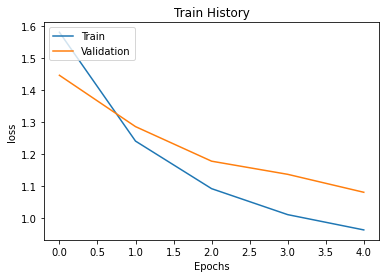

In [16]:
show_train_history(train_history, "loss", "val_loss")

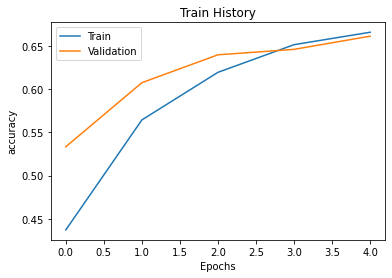

In [17]:
show_train_history(train_history, "accuracy", "val_accuracy")

## 评估模型

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print("Test accuracy: ", test_acc)

313/313 - 1s - loss: 1.0717 - accuracy: 0.6656 - 1s/epoch - 4ms/step
Test accuracy:  0.6656000018119812


In [19]:
## 应用模型

In [20]:
# 进行预测
test_pred = model.predict(x_test)

In [21]:

test_pred.shape

(10000, 10)

In [22]:
np.argmax(test_pred[0])

3

In [23]:
np.argmax(y_test[0])

0